### Libraries

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
file = "./NetflixOriginals.csv"
df = pd.read_csv(file,encoding='ISO-8859-1')

### 1-In which language were the long-running films created according to the dataset? Visualization.

### 2-Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

### 3-Which genre has the highest IMDB rating among movies shot in English?

### 4-What is the average 'runtime' of movies shot in 'Hindi'?

### 5-How many categories does the 'Genre' Column have and what are those categories? Express it visually.

### 6-Find the 3 most used languages in the movies in the data set.

### 7-What are the top 10 movies with the highest IMDB rating?

### 8-What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

### 9-Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

### 10-'What are the top 10 movies with the highest "Runtime"? Visualize.

In [19]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [20]:
max_runtime = df.sort_values("Runtime",ascending=False).head(10)
max_runtime 

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


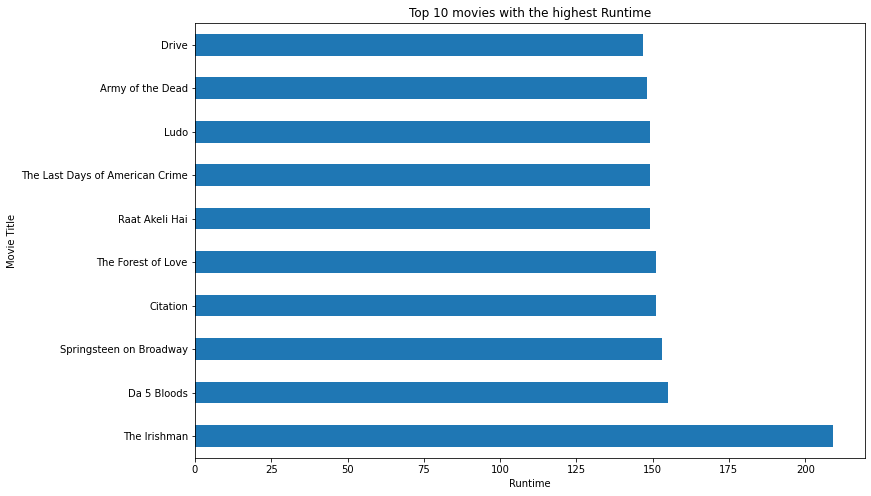

In [23]:
max_runtime.plot.barh(x="Title", y="Runtime", figsize=(12,8), title = "Top 10 movies with the highest Runtime", legend=False);
plt.xlabel("Runtime");
plt.ylabel("Movie Title");

### 11- In which year was the most movies released? Visualize it.

In [24]:
df["P_Year"] = df["Premiere"].str[-4:]
df["P_Year"] = df["P_Year"].astype("int32")

df.P_Year.unique()
year_of_max_film = df.P_Year.value_counts().sort_values(ascending=False)

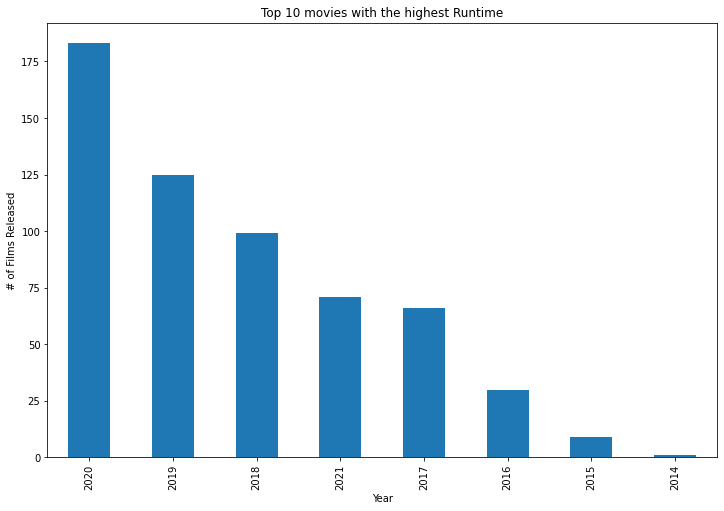

In [28]:
year_of_max_film.plot.bar(figsize=(12,8), title = "Top 10 movies with the highest Runtime", legend=False);
plt.xlabel("Year");
plt.ylabel("# of Films Released");

### 12- Which language movies have the lowest average IMDB rating? Visualize.

In [26]:
min_imdb = df.sort_values(by="IMDB Score", ascending=True)
min_imdb.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,P_Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020


In [13]:
min_imdb_language = df.groupby("Language")["IMDB Score"].mean().nsmallest(10)
min_imdb_language.head()

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Name: IMDB Score, dtype: float64

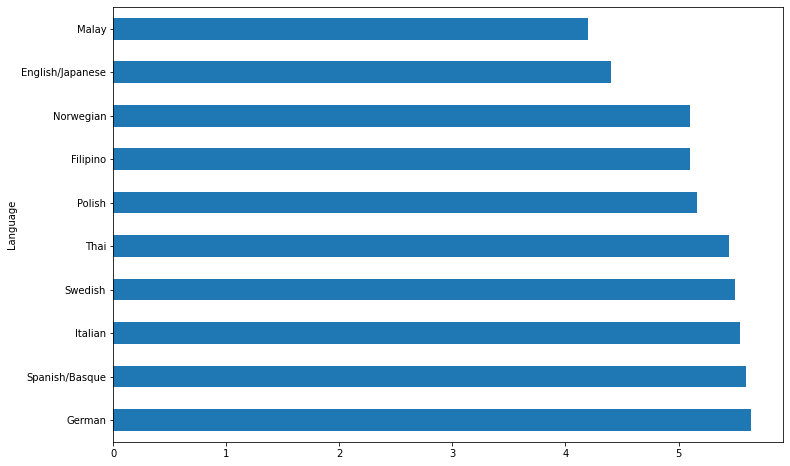

In [30]:
min_imdb_language.sort_values(ascending=False).plot.barh(figsize=(12,8));

### 13-Which year has the greatest total runtime?

### 14-What is the "Genre" where each language is used the most?

### 15-Veri setinde outlier veri var mıdır? Açıklayınız.